In [73]:
import numpy as np
import pandas as pd
import openturns as ot
import openturns.viewer as viewer
import math
from matplotlib import pylab as plt
import scipy

In [2]:
import modelib

In [3]:
#fp = 'small_ints.txt'
# for histogram in openturns, don't give counts
# giv raw sizes
fp = 'arch/data/intron.txt'
# 0 is intcount_bins, 1 is intfreq_bins, 2 is intsizes, 3 is intfreqs
data = modelib.get_intbins(fp, 500, 5)[2]
print(data)

[53, 121, 47, 49, 73, 42, 98, 89, 154, 47, 274, 95, 46, 82, 165, 47, 52, 180, 659, 1170, 48, 563, 53, 371, 46, 45, 46, 53, 528, 71, 59, 146, 241, 44, 50, 104, 43, 83, 44, 962, 429, 1173, 5862, 1301, 92, 436, 49, 285, 52, 299, 48, 56, 47, 46, 541, 43, 151, 486, 45, 46, 55, 402, 278, 663, 1811, 55, 419, 44, 136, 842, 54, 53, 42, 171, 51, 226, 53, 225, 54, 823, 49, 50, 45, 53, 572, 46, 183, 816, 45, 204, 345, 427, 60, 1554, 44, 152, 75, 626, 143, 154, 51, 48, 80, 48, 47, 45, 88, 45, 998, 206, 55, 52, 51, 47, 140, 48, 269, 51, 124, 582, 302, 197, 44, 166, 49, 48, 45, 56, 58, 45, 47, 50, 46, 48, 44, 46, 45, 47, 46, 57, 47, 293, 47, 44, 1622, 155, 677, 501, 255, 2572, 160, 45, 673, 47, 560, 45, 48, 443, 54, 53, 781, 58, 44, 56, 76, 68, 46, 45, 572, 401, 477, 50, 684, 46, 49, 797, 52, 85, 43, 206, 52, 45, 45, 53, 63, 52, 364, 106, 169, 343, 1060, 215, 120, 113, 1748, 522, 468, 728, 63, 70, 50, 178, 48, 210, 209, 50, 56, 46, 42, 375, 60, 298, 61, 1323, 51, 102, 251, 56, 113, 48, 387, 50, 1437,

In [14]:
# trying to use openturns
# https://openturns.discourse.group/t/help-with-reading-in-experimental-data-text-or-csv-file/135
# https://stackoverflow.com/questions/52455797/python-fitting-a-gev-distribution-from-these-values

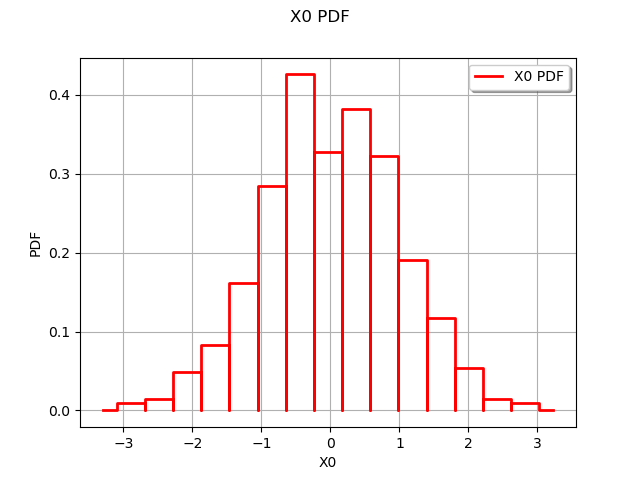

In [5]:
size = 500
normal = ot.Normal(1)
sample = normal.getSample(size)
ot.HistogramFactory().build(sample).drawPDF()

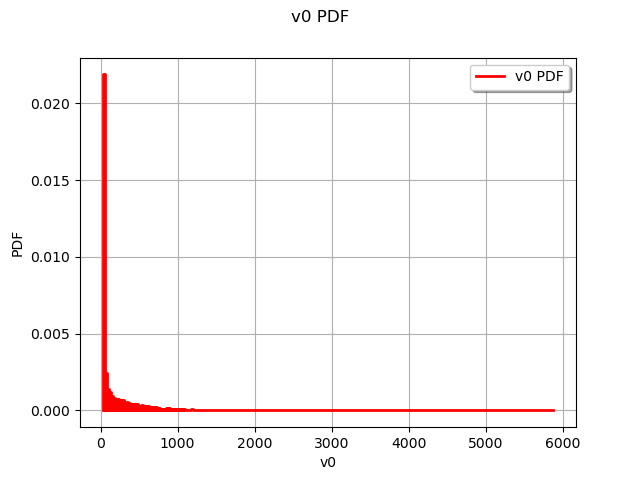

In [6]:
sample = ot.Sample([[x] for x in data])
# needs raw data as input, makes the histogram for you
# i was giving a histogram to a histogram making method...
ot.HistogramFactory().build(sample).drawPDF()

In [7]:
# this may explain pdfs
# https://plotly.com/chart-studio-help/histogram/
# https://www.statisticshowto.com/extreme-value-distribution/


In [7]:
print(math.exp(11))

59874.14171519782


In [4]:
max_precip = [9.4, 38.0, 12.5, 35.3, 17.6, 12.9, 12.4, 19.6, 15.0, 13.2, 12.3, 16.9, 16.9, 29.4, 13.6, 11.1, 8.0, 16.6, 12.0, 13.1, 9.1, 9.7, 21.0, 11.2, 14.4, 18.8, 14.0, 19.9, 12.4, 10.8, 21.6, 15.4, 17.4, 14.8, 22.7, 11.5, 10.5, 11.8, 12.4, 16.6, 11.7, 12.9, 17.8]
sample = ot.Sample([[f] for f in data])
gev = ot.GeneralizedExtremeValueFactory().buildAsGeneralizedExtremeValue(sample)
print(gev)
print(gev.getActualDistribution())

GeneralizedExtremeValue(mu=55.9286, sigma=24.541, xi=1.35926)
Frechet(beta = 18.0546, alpha = 0.735692, gamma = 37.874)


WRN - TNC went to an abnormal point x=[-nan,-nan,-nan] y=[] msg=TNC got a nan input value


In [13]:
# this doesn't work
def pdf(x, b, a, y):
    z = (x-y)/b
    #return ((a/b) * (z) ** (-1-a))(math.exp(-(z)**-a))
    term1 = (a/b)
    term2 = z**-a
    term3 = math.exp(-z**-a)
    return term1 * term2 * term3
    
print(pdf(100, 18, 0.7, 37.9))

0.010735739494318525


In [44]:
test = gev.getSample(1000)
#print(test)
testlist = []
for i in test:
    testlist.append(i[0])
#print(testlist)

<Axes: ylabel='Frequency'>

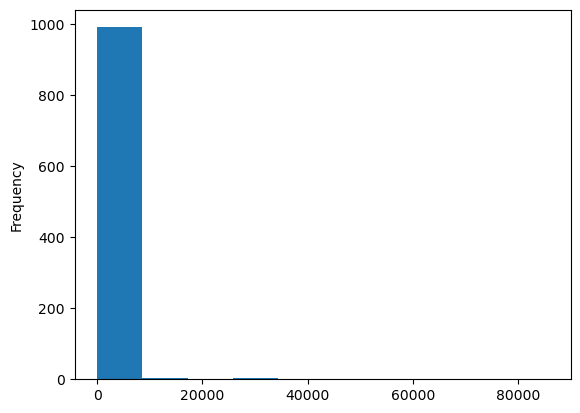

In [47]:
df = pd.DataFrame (testlist, columns = ['length'])
#df.hist(bins=1000)
df['length'].plot(kind='hist')

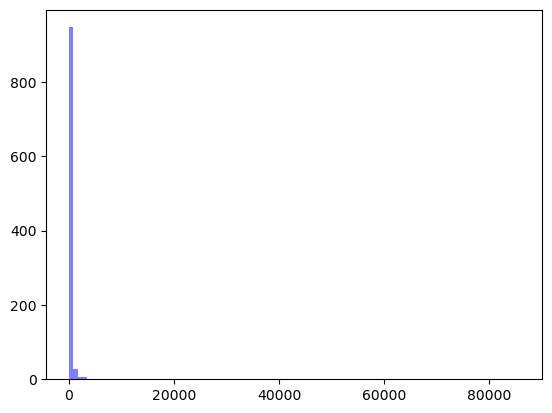

In [55]:
num_bins = 100
n, bins, patches = plt.hist(testlist, num_bins, facecolor='blue', alpha=0.5)
plt.show()

[<Axes: xlabel='X0', ylabel='PDF'>]


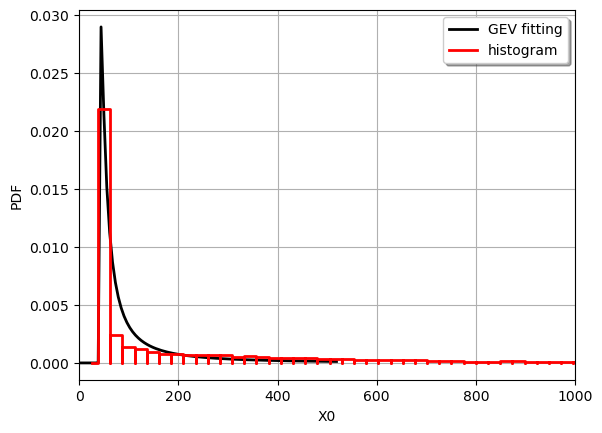

In [5]:
graph = gev.drawPDF()
graph.add(ot.HistogramFactory().build(sample).drawPDF())
graph.setColors(["black", "red"])
graph.setLegends(["GEV fitting", "histogram"])
graph.setLegendPosition("topright")

view = viewer.View(graph)
axes = view.getAxes()
print(axes)
_ = axes[0].set_xlim(0, 1000)
# does not look good, what if you used smoothed data?

In [28]:
dist1 = ot.GeneralizedExtremeValue(1.0, 2.0, -0.2)
myFrechet = ot.Frechet(1.0, 2.0, 3.0)
dist1 = ot.GeneralizedExtremeValue(myFrechet)
print(myFrechet)
print(dist1)

Frechet(beta = 1, alpha = 2, gamma = 3)
GeneralizedExtremeValue(mu=4, sigma=0.5, xi=0.5)


In [30]:
sample = dist1.getSample(5)
print(sample)

    [ X0      ]
0 : [ 4.67997 ]
1 : [ 3.70978 ]
2 : [ 6.30461 ]
3 : [ 5.1214  ]
4 : [ 4.30703 ]


In [31]:
sample1 = gev.getSample(5)
print(sample1)
# what does getting a sample mean?

    [ X0       ]
0 : [  67.7697 ]
1 : [  58.5681 ]
2 : [ 120.398  ]
3 : [ 242.19   ]
4 : [  54.1761 ]


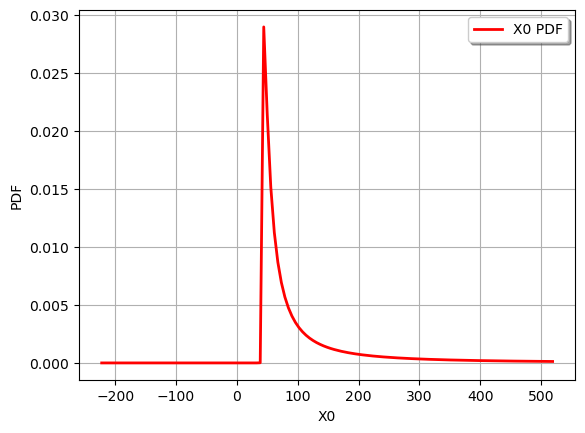

In [57]:
graph = gev.drawPDF()
view = viewer.View(graph)

In [233]:
def frechet_pdf(x, b, a, y):
    return ((a/b)((x-y)/b)**-1-a) * (math.exp(-((x-y)/b)**-a))

In [234]:
beta, alpha, gamma = 18.0546, 0.735692, 37.874

In [235]:
x_values = []
y_values = []
for x in range(38, 100):
    b = beta
    a = alpha
    y = gamma
    z = (x-y)/b
    term1 = ((a/b)*z)**(-1-a)
    term2 = math.exp((-z**-a))
    math.log2(term1)
    x_values.append(x)
    y_values.append(-math.log(2, term1*term2))

In [236]:
data = {
    'x': x_values,
    'y': y_values
}

df = pd.DataFrame(data)
df

,x,y
0,38,0.028404
1,39,-0.259613
2,40,-0.156010
3,41,-0.139598
4,42,-0.134471
...,...,...
57,95,-0.221664
58,96,-0.223428
59,97,-0.225194
60,98,-0.226963


(0.0, 200.0)

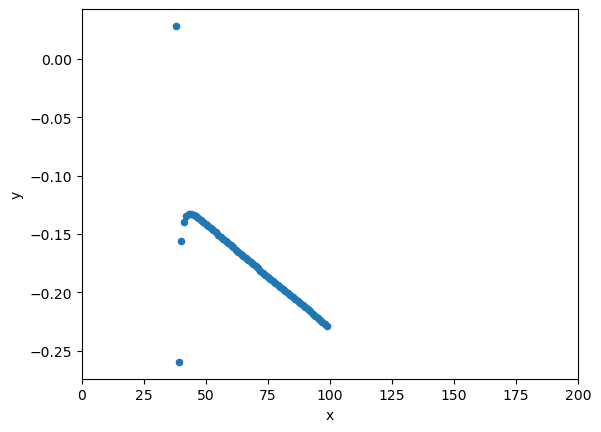

In [237]:
df.plot(x='x', y='y', kind='scatter')
plt.xlim(0,200)

In [229]:
# below 38 get errors
x = 0
#x = 38
b = beta
a = alpha
y = gamma
z = (x-y)/b
term1 = ((a/b)*z)**(-1-a)
#term2 = math.exp((-z**-a))
#print(math.exp(-z**-a))
# underflow error?
# i don't know how to implement a log scale
print(-math.log2(math.exp(-z**-a)))

TypeError: must be real number, not complex

In [192]:
x_values = []
y_values = []
for i in range(100):
    x = i
    y = frechet_pdf(x, beta, alpha, gamma)
    x_values.append(x)
    y_values.append(y)

TypeError: 'float' object is not callable

In [ ]:
# score for x len intron?
length = 150
